# Analysis of Lahman Data
**Problem Statement:**

How would you decide whether to trade a top minor league pitching prospect for a young all-star position player?

**Factors:**

Team-based:

* Payroll: Salary and number of years of control

* Depth: Team depth at each position - at major and minor league levels

*  for Winning: The general timeframe of the strategy of the team

Individual-based:

* Cross position metrics: WAR, etc. (vs average of position/league, vs other player)

* Position-specific metrics: compared vs league distribution - how easy is it to find a comparable player?

* Age: Age performance distributions across positions and player types (ie. power, on-base, etc.)

* Historical health: Any concerns over future health based on age and historical health record

* Positions: starting pitcher vs relief pitcher, middle position player vs corner, etc.

* Realization of Potential: Likelihood that the prospect wil translate to the majors


## STEP 1: Import Packages

In [18]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## STEP 2: Read in data

In [19]:
batting_df = pd.read_csv('./data/core/Batting.csv',
                         delimiter=',')
batting_df.head(5)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [20]:
people_df = pd.read_csv('./data/core/People.csv',
                        delimiter=',',
                        index_col=['playerID'],
                        usecols=['playerID','nameFirst','nameLast','birthYear','retroID','bbrefID'])
people_df.head(5)

,birthYear,nameFirst,nameLast,retroID,bbrefID
playerID,,,,,
aardsda01,1981.0,David,Aardsma,aardd001,aardsda01
aaronha01,1934.0,Hank,Aaron,aaroh101,aaronha01
aaronto01,1939.0,Tommie,Aaron,aarot101,aaronto01
aasedo01,1954.0,Don,Aase,aased001,aasedo01
abadan01,1972.0,Andy,Abad,abada001,abadan01


In [21]:
salary_df = pd.read_csv('./data/core/Salaries.csv',
                        delimiter=',')
salary_df.head(5)

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [22]:
# df.join(other, lsuffix='_caller', rsuffix='_other')
# df.set_index('key').join(other.set_index('key'))
# df.join(other.set_index('key'), on='key')

## STEP 3: Explore the data
### Average Salary by Year

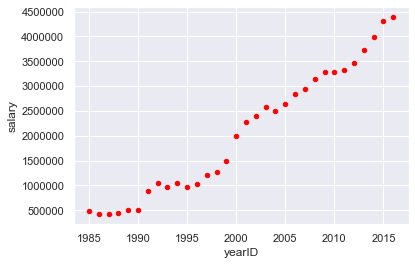

In [23]:
salary_by_year_df = salary_df.groupby(["yearID"], as_index=False)["salary"].mean()
salary_by_year_df.plot(kind='scatter',x='yearID',y='salary',color='red')
plt.show()

### Age vs Salary by Year

In [35]:
# Filter to some subset of years where we have salaries (1985 - 2016)
batting_filtered_df = batting_df.filter(['playerID','yearID','stint','teamID'])
batting_filtered_df = batting_filtered_df[(batting_df.yearID>=2000) & (batting_df.yearID<=2016)]

# Join batting with people information, mean salaries by year, and the player's salary
batting_filtered_df = batting_filtered_df.join(people_df, on='playerID').join(salary_by_year_df.set_index('yearID'), on='yearID')
batting_filtered_df.rename(columns={'salary':'meanSalary'}, inplace=True)
batting_filtered_df = pd.merge(batting_filtered_df, salary_df,  how='left', left_on=['yearID','playerID'], right_on = ['yearID','playerID'])

# Get rid of all rows without a salary
batting_filtered_df = batting_filtered_df[~batting_filtered_df.salary.isnull()]

# Calculate salary / avg salary
batting_filtered_df['normalizedSalary'] = batting_filtered_df.salary/batting_filtered_df.meanSalary

# Estimate age based on birth year and batting year
batting_filtered_df['age'] = batting_filtered_df.yearID - batting_filtered_df.birthYear

# batting_filtered_df = batting_filtered_df.filter['playerID','yearID','age', 'salary']
batting_filtered_df = batting_filtered_df.groupby(["yearID"], as_index=False)["normalizedSalary"].mean()
batting_filtered_df.head(5)

,yearID,normalizedSalary
0,2000,0.989507
1,2001,0.983868
2,2002,1.005173
3,2003,0.989762
4,2004,1.001810


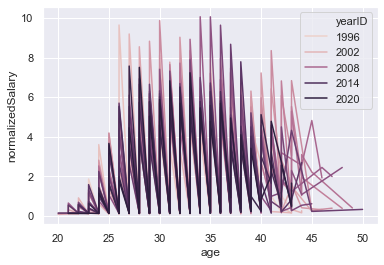

In [32]:
# Plot age vs salary/avg salary for every year

# sns.set(style='ticks')
# fg = sns.FacetGrid(data=batting_filtered_df, hue='yearID', aspect=1.61)
# fg.map(plt.scatter, 'age', 'salary').add_legend()

# sns.set(style='darkgrid')
sns.lineplot(data=batting_filtered_df, x="age", y="normalizedSalary", hue="yearID", estimator=None)
plt.show()

# plot_df = batting_filtered_df.pivot(index='age', columns='yearID', values='salary')
# plot_df.plot()
# batting_filtered_df.plot(kind='scatter',x='age',y='salary',color='red')
# plt.show()